In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

## Single Linear Regression

In [2]:
elec_df = pd.read_csv("data/elecdemand.csv")

#elec = elec[elec["temp"] > 15]

print(elec_df.shape)
elec_df.head()

(17520, 3)


,demand,workday,temp
0,3.914647,0,18.2
1,3.672550,0,17.9
2,3.497539,0,17.6
3,3.339145,0,16.8
4,3.204313,0,16.3


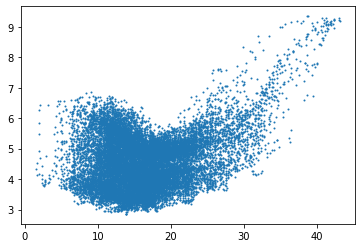

In [3]:
# Plot temperature vs. demand
plt.scatter(elec_df["temp"], elec_df["demand"], s=1);

In [4]:
# Step 1: Assemble our X and y variables

# We need an X matrix that is n-by-p (in this case, p = 1)
X = elec_df[["temp"]]

# We need a y vector that is length n
y = elec_df["demand"]

In [5]:
# Step 2: Import our model class
from sklearn.linear_model import LinearRegression

In [6]:
# Step 3: Instantiate the model
lr = LinearRegression()

In [7]:
# Step 4: Fit the model
lr.fit(X, y)

LinearRegression()

In [8]:
# Take a peek at the model coefficient and intercept
print(lr.intercept_)
print(lr.coef_)

3.88781001901475
[0.04375152]


In [9]:
# Make predictions
y_pred = lr.predict(X)

In [10]:
# We can plot them, too!
plt.scatter(elec["temp"], elec["demand"], s=1)
plt.plot(elec["temp"], y_pred, color='red');

NameError: name 'elec' is not defined

In [ ]:
# Creat residuals
resids = y - y_pred

In [ ]:
# (THREAD) Compute the MSE
mse = np.mean(resids**2)
mse

0.7101335025427618

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y, y_pred)

0.0782920545211605

In [ ]:
# ... or directly from the model...
lr.score(X, y)

0.0782920545211605

In [ ]:
corr = elec_df.corr()


<AxesSubplot:>

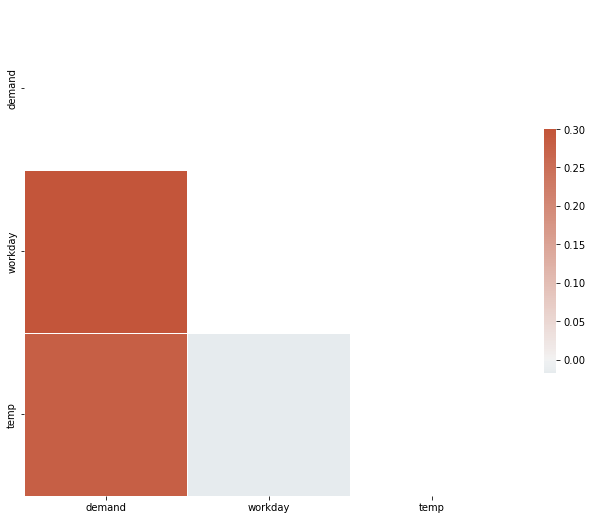

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
